## Library yang digunakan

In [ ]:
from keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import models, layers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


## Memanggil data cifar10

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Gambar-gambar yang ada pada dataset cifar10

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

               
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
train_images.shape

In [ ]:
test_images.shape

In [ ]:
train_labels.shape

In [ ]:
test_labels.shape

In [8]:
train_labels


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Visualisasi kelas-kelas yang ada 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[[Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')]]

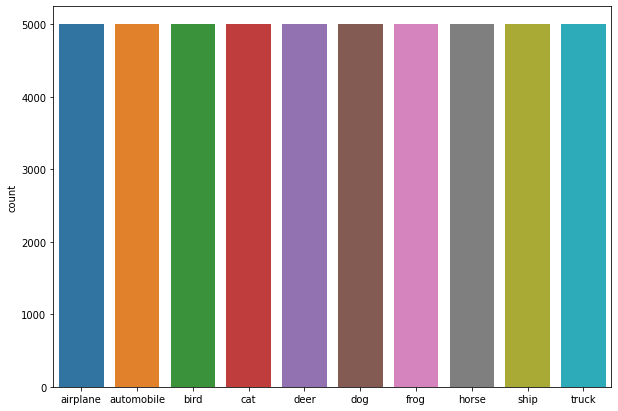

In [9]:
import seaborn as sns
plt.figure(figsize=(10,7))
p = sns.countplot(train_labels.flatten())
p.set(xticklabels=class_names)

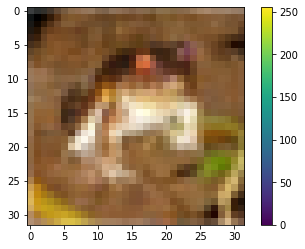

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# scaling dengan tujuan mengubah nilai per pixel dari rentang 0-255 menjadi 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

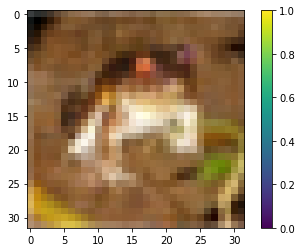

In [12]:
# visualisasi ulang dari data pertama data latih
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
# Data Preprocessing
train_images = train_images.reshape((train_images.shape[0], 32, 32, 3)).astype('float32')
test_images = test_images.reshape((test_images.shape[0], 32, 32, 3)).astype('float32')

# to_categorical terhadap data labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [14]:
# Definisikan model konvolusi yang digunakan, yaitu: Konvolusi dengan jumlah filter sebanyak 96 berukuran 3 x 3 serta max pooling
# dengan ukuran 2 x 2
model = Sequential()
model.add(Conv2D(filters = 96, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=30, batch_size = 1000)


Epoch 1/30
50/50 [==============================] - 69s 1s/step - loss: 2.0523 - accuracy: 0.2492 - val_loss: 1.5695 - val_accuracy: 0.4380
Epoch 2/30
50/50 [==============================] - 69s 1s/step - loss: 1.5238 - accuracy: 0.4534 - val_loss: 1.3839 - val_accuracy: 0.4999
Epoch 3/30
50/50 [==============================] - 69s 1s/step - loss: 1.3446 - accuracy: 0.5249 - val_loss: 1.3201 - val_accuracy: 0.5272
Epoch 4/30
50/50 [==============================] - 68s 1s/step - loss: 1.2578 - accuracy: 0.5561 - val_loss: 1.2326 - val_accuracy: 0.5667
Epoch 5/30
50/50 [==============================] - 68s 1s/step - loss: 1.1810 - accuracy: 0.5830 - val_loss: 1.1772 - val_accuracy: 0.5874
Epoch 6/30
50/50 [==============================] - 73s 1s/step - loss: 1.1231 - accuracy: 0.6105 - val_loss: 1.1459 - val_accuracy: 0.6005
Epoch 7/30
50/50 [==============================] - 71s 1s/step - loss: 1.0593 - accuracy: 0.6325 - val_loss: 1.1030 - val_accuracy: 0.6139
Epoch 8/30
50/50 [==

### Membuat prediksi

In [16]:
predictions = model.predict(test_images)

In [17]:
Y_pred_classes = np.argmax(predictions , axis=1) 
Y_true = np.argmax(test_labels, axis=1)

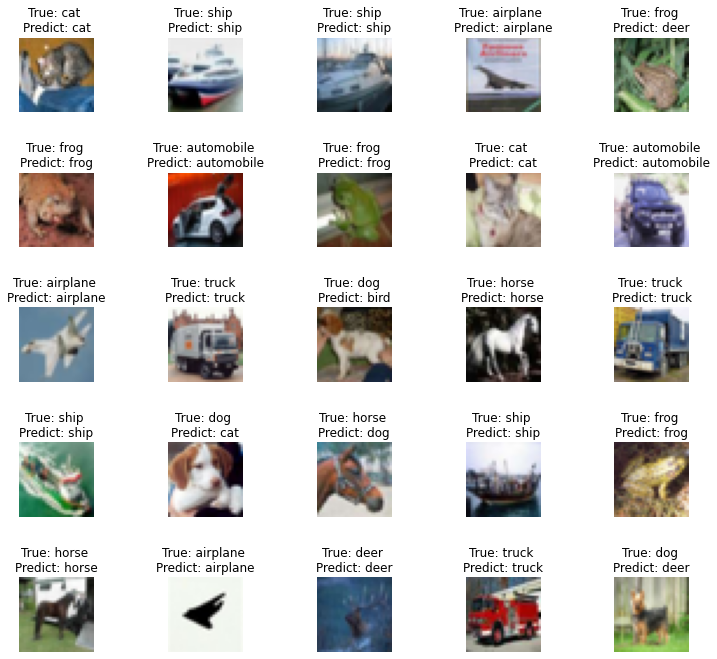

In [18]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[Y_true[i]], class_names[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

Dapat terlihat bahwa haris prediksi terhadap gamabr yang ada tidak maksimal benar semua dikarenakan nilai akurasi model hanya sekitar 0.6 (karena model yang digunakan disesuaikan dengan file computer vision guide). Seperti contoh untuk gambar dog, model kita memprediksi bahwa hasilnya adalah cat.

## Visualisasi model untuk loss dan akurasi 

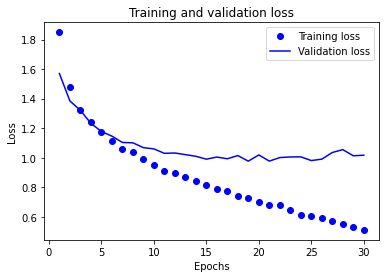

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

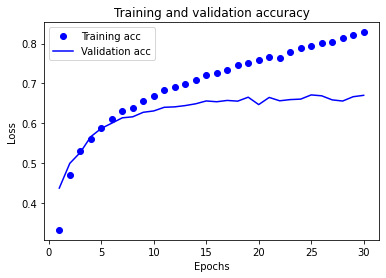

In [20]:
plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Dari kedua grafik diatas, dapat terlihat untuk grafik training and validation loss, nilai loss berada pada range 1 - 1,1 dan tidak lagi mengalami peningkatan seiiring pertambahan epoch dan naiknya nilai training. Sedangkan pada grafik training and validation accuracy, nilai akurasi berada pada 0.6 sekian dan tidak lagi mengalami pertambahan seiring bertambahnya epoch dan naiknya nilai training. 

## skor akurasi dan loss model yang dibuat

In [21]:
scores2 = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', scores2[0])
print('Test accuracy:', scores2[1])

313/313 [==============================] - 5s 17ms/step - loss: 1.0167 - accuracy: 0.6703
Test loss: 1.0166693925857544
Test accuracy: 0.6703000068664551


Kesimpulan

- Model yang dipakai memiliki loss sebesar 1.01 dan tingkat akurasi sebesar 0.67.

- Model disesuaikan dengan model yang ada pada file computer vision - guide. Hanya saja ada beberapa yang diganti seperti jumlah epoch = 30, menggunakan loss= categorical crossentropy dan filters untuk conv2D = 96. Dengan mengubah hal ini, akurasi dalam memprediksi dapat ditingkatkan seperti prediksi gambar di line sebelumnya walaupun masih ada beberapa yang salah prediksi.

- Jika jumlah epoch dan loss yang digunakan sama dengan yang ada pada file computer vision - guide, maka hasil akurasi hanya sebesar 0.5 sekian dan hasil prediksi juga melenceng lebih jauh.


